In [9]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import tensorflow as tf

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
# Import Mask-RCNN
sys.path.append(ROOT_DIR) # to find the local lib

from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

MODEL_PATH = "logs" # Directory to save logs and trained model
WEIGHT_PATH = "mask_rcnn_coco.h5" # Pretrained weight on local path
# Download weight if not exist
if not os.path.exists(WEIGHT_PATH):
    utils.download_trained_weights(WEIGHT_PATH)

In [4]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

In [5]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [6]:
class CustomConfig(Config):
    """Configuration for training on the custom  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "object"

    IMAGES_PER_GPU = 1

    NUM_CLASSES = 1 + 2  # Background + Car and truck

    # Number of training steps per epoch
    STEPS_PER_EPOCH = 10

    # Skip detections with < 90% confidence
    DETECTION_MIN_CONFIDENCE = 0.9

In [7]:
config = CustomConfig()

In [11]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_PATH,
                              config=config)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [12]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
conv1/kernel:0,"(7, 7, 3, 64)",-0.0427,+0.0427,+0.0248
conv1/bias:0,"(64,)",+0.0000,+0.0000,+0.0000
bn_conv1/gamma:0*** dead?,"(64,)",+1.0000,+1.0000,+0.0000
bn_conv1/beta:0*** dead?,"(64,)",+0.0000,+0.0000,+0.0000
bn_conv1/moving_mean:0*** dead?,"(64,)",+0.0000,+0.0000,+0.0000
bn_conv1/moving_variance:0*** dead?,"(64,)",+1.0000,+1.0000,+0.0000
res2a_branch2a/kernel:0,"(1, 1, 64, 64)",-0.2162,+0.2164,+0.1250
res2a_branch2a/bias:0,"(64,)",+0.0000,+0.0000,+0.0000
bn2a_branch2a/gamma:0*** dead?,"(64,)",+1.0000,+1.0000,+0.0000
bn2a_branch2a/beta:0*** dead?,"(64,)",+0.0000,+0.0000,+0.0000


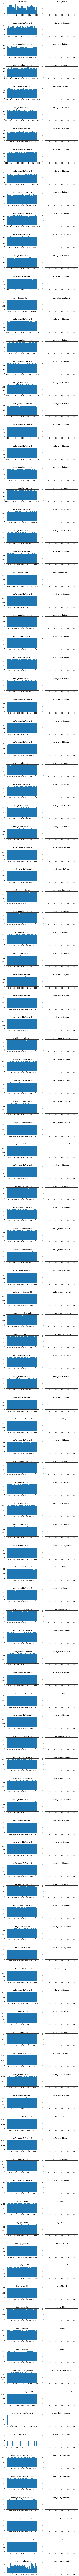

In [13]:
# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)